# DYNAMIC PRICE PREDICTION OF AIRLINES¶

###### Importing usefull Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

###### Read the Data

In [2]:
train_data=pd.read_excel('TRAIN.xlsx')
test_data=pd.read_excel('TEST.xlsx')

###### Explore datasets

In [3]:
train_data.shape,test_data.shape

((9000, 11), (1683, 10))

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            9000 non-null   object
 1   Date               9000 non-null   object
 2   Departure Station  9000 non-null   object
 3   Arrival Station    9000 non-null   object
 4   Route Map          9000 non-null   object
 5   Departure Time     9000 non-null   object
 6   Arrival Time       9000 non-null   object
 7   Journey Time       9000 non-null   object
 8   Stops              9000 non-null   object
 9   Extra Info         9000 non-null   object
 10  Price              9000 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 773.6+ KB


In [5]:
train_data.head(2)

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            1683 non-null   object
 1   Date               1683 non-null   object
 2   Departure Station  1683 non-null   object
 3   Arrival Station    1683 non-null   object
 4   Route Map          1682 non-null   object
 5   Departure Time     1683 non-null   object
 6   Arrival Time       1683 non-null   object
 7   Journey Time       1683 non-null   object
 8   Stops              1682 non-null   object
 9   Extra Info         1683 non-null   object
dtypes: object(10)
memory usage: 131.6+ KB


In [7]:
test_data.head(2)

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info
0,Jet Airways,9/05/2019,Kolkata,Banglore,CCU → DEL → BLR,20:25,21:05 10 May,24h 40m,1 stop,No info
1,GoAir,15/04/2019,Banglore,Delhi,BLR → DEL,20:55,23:40,2h 45m,non-stop,No info


##### Some visualizations about train data

Text(0, 0.5, 'Count of flights')

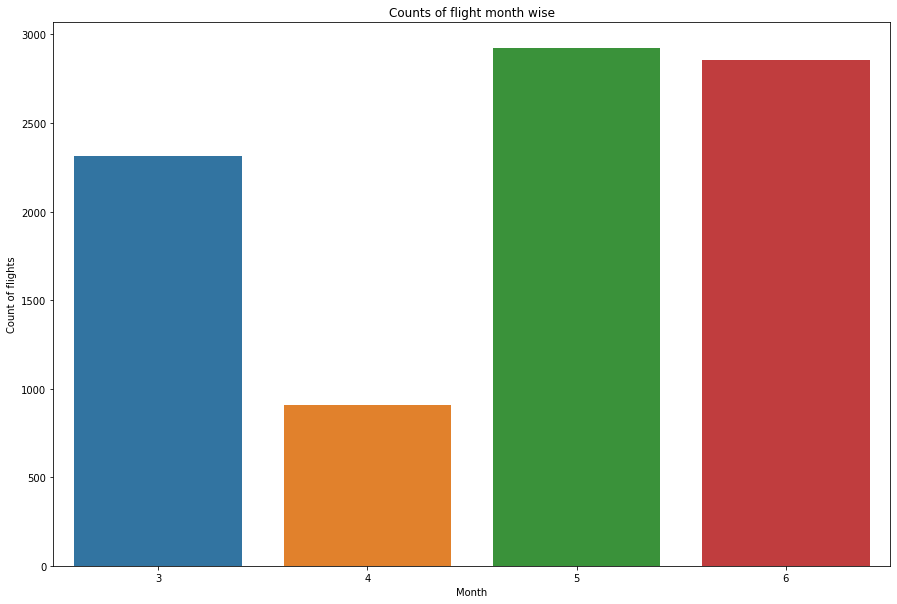

In [54]:
import seaborn as sb
plt.figure(figsize=(15,10))
plt.title('Counts of flight month wise')
ax=sb.countplot(x='Journey_month',data=train_data)
plt.xlabel('Month')
plt.ylabel('Count of flights')

In [55]:
#MONTH OF MAY AND JUNE THE NUMBER OF FLIGHTS IS HIGH BECAUSE OF SEASON TIME

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

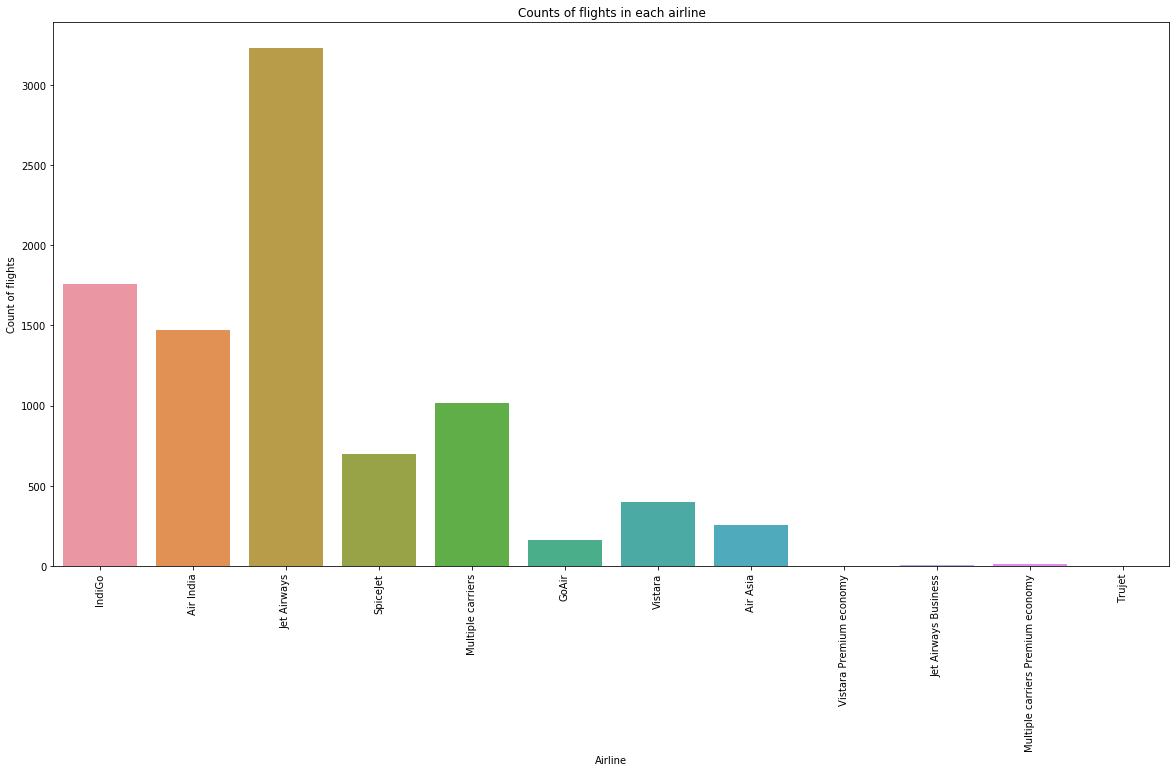

In [56]:
import seaborn as sb
plt.figure(figsize=(20,10))
plt.title('Counts of flights in each airline')
ax=sb.countplot(x='Airline',data=train_data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation=90)

In [57]:
#There are more number of flights of Jet Airways.Jet Airways Business,Vistara Premium economy,Truejet have actually almost negligible flights

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

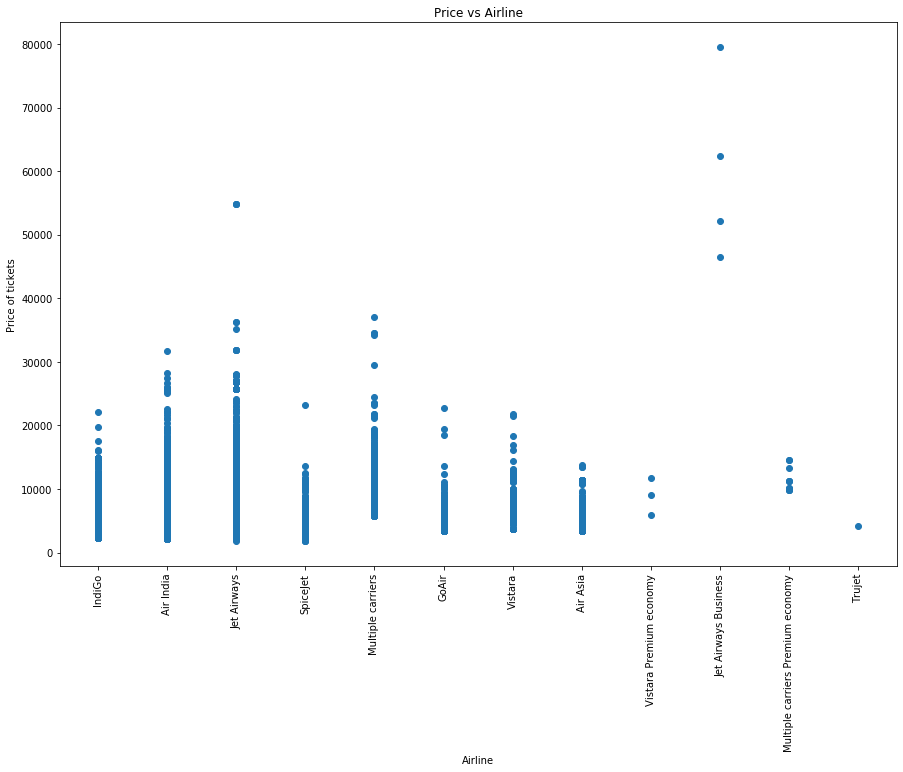

In [58]:
plt.figure(figsize=(15,10))
plt.title('Price vs Airline')
plt.scatter(train_data['Airline'],train_data['Price'])
plt.xlabel('Airline')
plt.ylabel('Price of tickets')
plt.xticks(rotation=90)

In [59]:
#The ticket rate for JET AIRWAYS BUSINESS airline is high,ie.,no of flights are less.

### Missing value treatment

In [9]:
train_data.isnull().sum()

Airline              0
Date                 0
Departure Station    0
Arrival Station      0
Route Map            0
Departure Time       0
Arrival Time         0
Journey Time         0
Stops                0
Extra Info           0
Price                0
dtype: int64

In [10]:
test_data.isnull().sum()/len(test_data)*100

Airline              0.000000
Date                 0.000000
Departure Station    0.000000
Arrival Station      0.000000
Route Map            0.059418
Departure Time       0.000000
Arrival Time         0.000000
Journey Time         0.000000
Stops                0.059418
Extra Info           0.000000
dtype: float64

In [11]:
#There is missing value in test_data,not in train_data.
#One point to note that,there is 0.05% of missing data.we can go for imputation rather than dropping it.

In [12]:
test_data['Route Map']=test_data['Route Map'].fillna(test_data['Route Map'].mode()[0])

In [13]:
test_data['Stops']=test_data['Stops'].fillna(test_data['Stops'].mode()[0])

In [14]:
test_data.isnull().sum()

Airline              0
Date                 0
Departure Station    0
Arrival Station      0
Route Map            0
Departure Time       0
Arrival Time         0
Journey Time         0
Stops                0
Extra Info           0
dtype: int64

In [15]:
#Outlier analysis:As the datas are categorical in nature there is no effect of outliers


In [16]:
train_data["Extra Info"].value_counts()

No info                         7053
In-flight meal not included     1649
No check-in baggage included     270
1 Long layover                    17
Change airports                    4
Business class                     3
No Info                            2
Red-eye flight                     1
1 Short layover                    1
Name: Extra Info, dtype: int64

In [17]:
train_data["Extra Info"] = train_data["Extra Info"].replace({'No info': 'No Info'})

###### Feature Engineering ( Dividing data into features and labels)

In [18]:
# Duration convert hours in min.
train_data['Journey Time']=  train_data['Journey Time'].str.replace("h",'*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_data['Journey Time']=  test_data['Journey Time'].str.replace("h",'*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [19]:
train_data.head(1)

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No Info,3897


In [20]:
#adding relevent columns that help to make inferences better
#for train_data

In [21]:
# Date_of_Journey
train_data["Journey_day"] = train_data['Date'].str.split('/').str[0].astype(int)
train_data["Journey_month"] = train_data['Date'].str.split('/').str[1].astype(int)
train_data.drop(["Date"], axis = 1, inplace = True)

# Dep_Time
train_data["Dep_hour"] = pd.to_datetime(train_data["Departure Time"]).dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data["Departure Time"]).dt.minute
train_data.drop(["Departure Time"], axis = 1, inplace = True)

# Arrival_Time
train_data["Arrival_hour"] = pd.to_datetime(train_data['Arrival Time']).dt.hour
train_data["Arrival_min"] = pd.to_datetime(train_data['Arrival Time']).dt.minute
train_data.drop(["Arrival Time"], axis = 1, inplace = True)

In [22]:
#for test_data
# Date_of_Journey
test_data["Journey_day"] = test_data['Date'].str.split('/').str[0].astype(int)
test_data["Journey_month"] = test_data['Date'].str.split('/').str[1].astype(int)
test_data.drop(["Date"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Departure Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Departure Time"]).dt.minute
test_data.drop(["Departure Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data['Arrival Time']).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data['Arrival Time']).dt.minute
test_data.drop(["Arrival Time"], axis = 1, inplace = True)

In [23]:
train_data["Extra Info"] = train_data["Extra Info"].replace({'No info': 'No Info'})
test_data["Extra Info"] = test_data["Extra Info"].replace({'No info': 'No Info'})

###### Convert categorical data into numerical


In [24]:
train_catg_data = train_data.select_dtypes(exclude=['int64', 'float','int32'])
train_num_data = train_data.select_dtypes(include=['int64', 'float','int32'])

test_catg_data = test_data.select_dtypes(exclude=['int64', 'float','int32','int32'])
test_num_data  = test_data.select_dtypes(include=['int64', 'float','int32'])

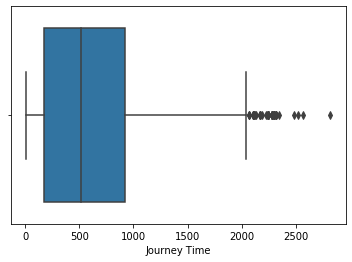

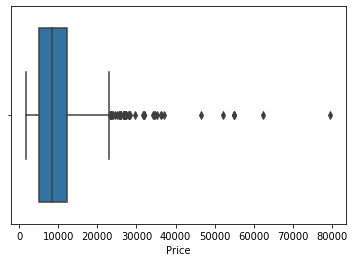

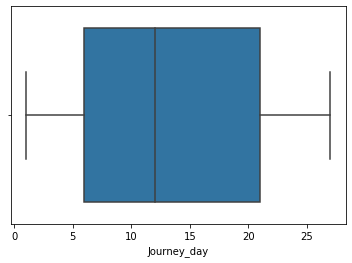

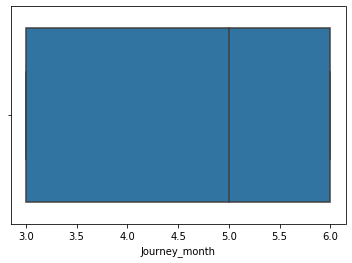

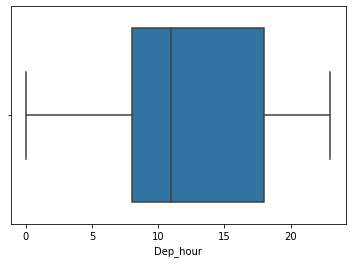

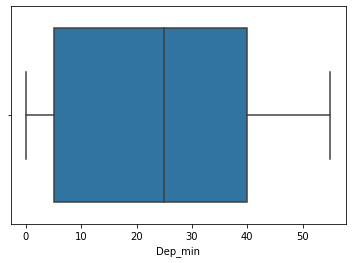

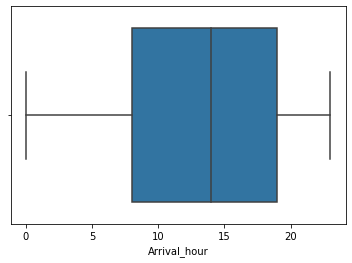

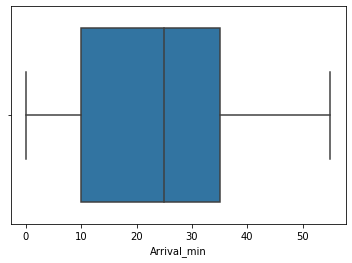

In [25]:
#Outlier
for i in train_num_data.columns:
    sb.boxplot(train_num_data[i])
    plt.show()

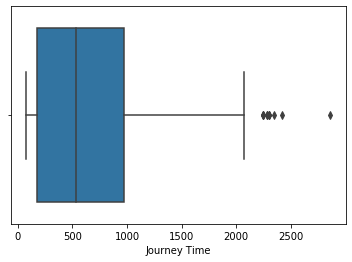

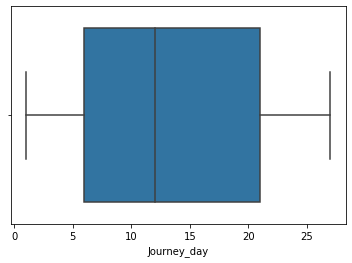

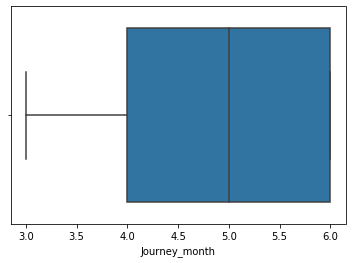

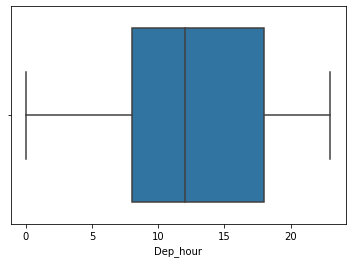

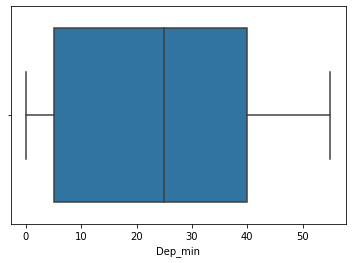

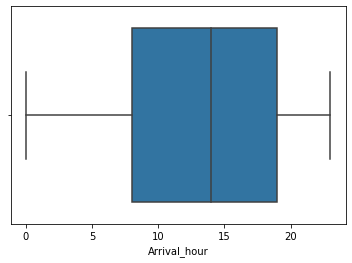

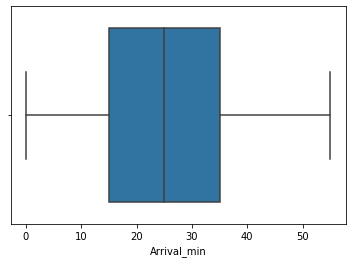

In [26]:
for i in test_num_data.columns:
    sb.boxplot(test_num_data[i])
    plt.show()

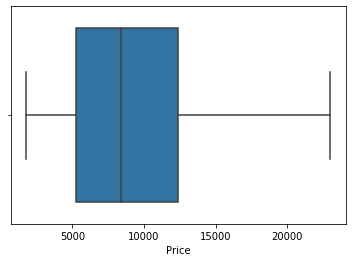

In [27]:
q3= train_num_data['Price'].quantile(0.75)
q1= train_num_data['Price'].quantile(0.25)
iqr = q3-q1
ub = q3 +1.5*iqr
lb = q1 - 1.5*iqr
train_num_data['Price']=train_num_data['Price'].replace(train_num_data[train_num_data['Price']>ub]['Price'],train_num_data['Price'].quantile(0.99))
train_num_data['Price']=train_num_data['Price'].replace(train_num_data[train_num_data['Price']<lb]['Price'],train_num_data['Price'].quantile(0.01))
sb.boxplot(train_num_data['Price'])

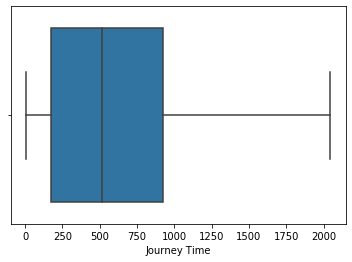

In [28]:
q3= train_num_data['Journey Time'].quantile(0.75)
q1= train_num_data['Journey Time'].quantile(0.25)
iqr = q3-q1
ub = q3 +1.5*iqr
lb = q1 - 1.5*iqr
train_num_data['Journey Time']=train_num_data['Journey Time'].replace(train_num_data[train_num_data['Journey Time']>ub]['Journey Time'],train_num_data['Journey Time'].quantile(0.99))
train_num_data['Journey Time']=train_num_data['Journey Time'].replace(train_num_data[train_num_data['Journey Time']<lb]['Journey Time'],train_num_data['Journey Time'].quantile(0.01))
sb.boxplot(train_num_data['Journey Time'])

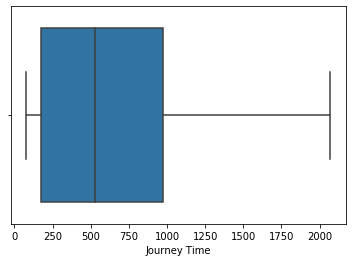

In [29]:
q3= test_num_data['Journey Time'].quantile(0.75)
q1= test_num_data['Journey Time'].quantile(0.25)
iqr = q3-q1
ub = q3 +1.5*iqr
lb = q1 - 1.5*iqr
test_num_data['Journey Time']=test_num_data['Journey Time'].replace(test_num_data[test_num_data['Journey Time']>ub]['Journey Time'],test_num_data['Journey Time'].quantile(0.99))
test_num_data['Journey Time']=test_num_data['Journey Time'].replace(test_num_data[test_num_data['Journey Time']<lb]['Journey Time'],test_num_data['Journey Time'].quantile(0.01))
sb.boxplot(test_num_data['Journey Time'])

In [30]:
train_catg_data.head(10)

,Airline,Departure Station,Arrival Station,Route Map,Stops,Extra Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No Info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No Info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No Info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No Info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No Info
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No Info
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No Info
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info


###### Concatenate both categorical and numerical data

In [31]:
train_inp= pd.concat([train_catg_data, train_num_data], axis=1)
train_out=train_data['Price']
test_set = pd.concat([test_catg_data, test_num_data], axis=1)

# Encoding
Combine

The train and test data are combined for easy one-hot and label encoding

In [32]:
data_enc= pd.concat([train_inp, test_set])

In [33]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data_enc['Extra Info'])
data_enc['Extra Info']=le.fit_transform(data_enc['Extra Info'])
data_enc.head()

,Airline,Departure Station,Arrival Station,Route Map,Stops,Extra Info,Journey Time,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,6,170.0,3897.0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,6,445.0,7662.0,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,6,1140.0,13882.0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6,325.0,6218.0,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,6,285.0,13302.0,1,3,16,50,21,35


In [34]:
#one hot encoding
to_one_hot = ['Airline','Departure Station','Arrival Station','Route Map','Stops']

data_enc= pd.concat([data_enc,pd.get_dummies(data_enc[to_one_hot])], axis=1)
data_enc.drop(to_one_hot, axis=1, inplace=True)
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683 entries, 0 to 1682
Columns: 165 entries, Extra Info to Stops_non-stop
dtypes: float64(2), int32(3), int64(4), uint8(156)
memory usage: 2.3 MB


### Split them up again into train and test

In [35]:
train_inp=data_enc[data_enc['Price'].notnull()]
test_set=data_enc[data_enc['Price'].isnull()]
test_set=test_set.drop(columns='Price')
train_inp=train_inp.drop(['Price'],axis=1)


In [36]:
(train_inp.shape, test_set.shape)

((9000, 164), (1683, 164))

#### Train data-Splitting

In [37]:
# train  and splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_inp,train_out,test_size=0.3,random_state=48)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


In [39]:
rgs1=LinearRegression()
rgs2=DecisionTreeRegressor(random_state=48)
rgs3=BaggingRegressor(random_state=48)
rgs4=RandomForestRegressor(random_state=48)
rgs5=AdaBoostRegressor(random_state=48)
rgs6=GradientBoostingRegressor(random_state=48)
rgs7=XGBRegressor(random_state=48)

In [40]:
train_out.describe()

count     9000.000000
mean      9087.764333
std       4605.498942
min       1759.000000
25%       5228.000000
50%       8369.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [41]:
from sklearn.model_selection import cross_val_score
for i,j in zip([rgs1,rgs2,rgs3,rgs4,rgs5,rgs6,rgs7],['LoR','DT','Bag','RF','Ada','GBoost','XGB']):
    res=cross_val_score(i,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
    res1=np.sqrt(abs(res))
    print(j,'Mean error:',np.mean(res1),'Variance Error:',np.std(res1))

LoR Mean error: 51132216724.5406 Variance Error: 25951780207.40298
DT Mean error: 1932.5923535212464 Variance Error: 121.38958570542802
Bag Mean error: 1680.0765745454858 Variance Error: 153.94739771321147
RF Mean error: 1620.738066608464 Variance Error: 145.8162520342671
Ada Mean error: 3550.3293467334893 Variance Error: 140.32477130028283
GBoost Mean error: 1989.4766847508886 Variance Error: 201.2109474854688
XGB Mean error: 1591.7190248987256 Variance Error: 65.8807814857547


In [42]:
from sklearn.model_selection import cross_val_score
for i,j in zip([rgs1,rgs2,rgs3,rgs4,rgs5,rgs6,rgs7],['LoR','DT','Bag','RF','Ada','GBoost','XGB']):
    res=cross_val_score(i,X_train,y_train,cv=5,scoring='r2')
    print(j,'Mean Error:',np.mean(res),'Variance Error:',np.std(res))

LoR Mean Error: -164709369399367.7 Variance Error: 148276266235552.84
DT Mean Error: 0.8191041978255861 Variance Error: 0.022453811771542924
Bag Mean Error: 0.863770539254547 Variance Error: 0.018216451534391102
RF Mean Error: 0.8730110898069802 Variance Error: 0.01796340063271022
Ada Mean Error: 0.3899168613591197 Variance Error: 0.06134768185630541
GBoost Mean Error: 0.8084969599535976 Variance Error: 0.03071512208501548
XGB Mean Error: 0.8777575104702192 Variance Error: 0.007308486423245332


In [43]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True,random_state=48)
from sklearn.model_selection import GridSearchCV
tuned_params = {'max_depth': [2,4,6,8],'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [200,400,600,800], 'reg_lambda': [0.001, 0.1, 1.0,10.0, 100.0]}
model = GridSearchCV(XGBRegressor(),tuned_params,scoring = 'neg_mean_absolute_error', cv=kf, n_jobs=-1)
model.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=48, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monot...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                         

In [44]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [45]:
y_test_pred=pd.DataFrame(y_test_pred)
y_test1=y_test.reset_index(drop=True)
Output=pd.concat([y_test1,y_test_pred],1)
Output

,Price,0
0,9413,8378.450195
1,14151,13761.356445
2,6144,4422.690430
3,7677,8458.858398
4,11982,11829.959961
...,...,...
2695,13587,13281.538086
2696,13067,12160.334961
2697,7832,8542.224609
2698,5048,4455.332031


In [46]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
print("Train Results for XGBoost Regressor Model:")
print("Root mean squared error: ", sqrt(mse(y_test1.values,y_test_pred)))
print("R-squared:", r2_score(y_test1.values,y_test_pred))

Train Results for XGBoost Regressor Model:
Root mean squared error:  1456.006797771945
R-squared: 0.904539152401861


In [47]:
#Testing the model with test data set:test_set

In [48]:
test_set.head(2)

,Extra Info,Journey Time,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air Asia,Airline_Air India,...,Route Map_DEL → PNQ → COK,Route Map_DEL → RPR → NAG → BOM → COK,Route Map_DEL → TRV → COK,Route Map_DEL → UDR → BOM → COK,Route Map_MAA → CCU,Stops_1 stop,Stops_2 stops,Stops_3 stops,Stops_4 stops,Stops_non-stop
0,6,1480.0,9,5,20,25,21,5,0,0,...,0,0,0,0,0,1,0,0,0,0
1,6,165.0,15,4,20,55,23,40,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
y_testdata_pred = model.predict(test_set)

In [50]:
y_testdata_pred=pd.DataFrame(y_testdata_pred)

In [51]:
y_testdata_pred.shape

(1683, 1)

In [52]:
y_testdata_pred.head(10)

,0
0,12451.555664
1,4078.793457
2,10274.034180
3,4005.637939
4,3379.327393
5,14882.162109
6,9467.480469
7,8911.913086
8,8903.013672
9,6344.684570


In [60]:
y_testdata_pred.to_csv('Final_submission.csv')